In [ ]:
# Bike sharing demand , kaggle knowledge competetion
# to be solved : 
# Prediction of bike rental count hourlybased on the environmental and seasonal settings.

# Approach 

# Researching the problem 
# Initial exploration on the data, 
# Forming some hypothesis about the trends existing in the data, 
# Proving the hypothesis by looking at the data, 
# Training different regressor and comparing the results and score of each regressor
# Writing an outlook on how to proceed. 


In [74]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn import linear_model, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [75]:
def linReg(X_train, X_test, y_train, y_test):
    
    regr = linear_model.LinearRegression()
    y_predict=regr.fit(X_train, y_train).predict(X_test)
    #crossArr= cross_validation.cross_val_score(regr, X, y, cv=5)
    #crossScore=np.mean(crossArr)
    acc= metrics.r2_score(y_test, y_predict)
    mse=mean_squared_error(y_test,y_predict)
    mae=mean_absolute_error(y_test,y_predict)
    print ('for Linear Regression  R^2 is %s,Mean Square error is:%s & mean absolute error is :%s ' %(acc,mse,mae))
    return y_predict,[acc,mse,mae]

In [76]:
def treeReg(X_train, X_test, y_train, y_test):
    #Training a Regression Tree model  Tried different depth, 10 seems to have a good score
    # with 10 one gets a better score however the danger of overfitting is there. 
    
    regr = DecisionTreeRegressor(max_depth=10)
    # fit the Training set to the regression tree model.
    regr.fit(X_train, y_train)
    # predicting values of y of the test set 
    y_predict = regr.predict(X_test)
    
    acc= metrics.r2_score(y_test, y_predict)
    mse=mean_squared_error(y_test,y_predict)
    mae=mean_absolute_error(y_test,y_predict)

    print ('for Tree Regression R^2 is:%s ,Mean Square error is:%s & mean absolute error is :%s ' %(acc,mse,mae))
    return y_predict,[acc,mse,mae]

In [77]:
def supportVectorReg(X_train, X_test, y_train, y_test):
    #Fit supporT vector regression
    clf = svm.SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.05, gamma='auto',
        kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    clf.fit(X_train, y_train) 
    y_predict = clf.predict(X_test)
    acc= metrics.r2_score(y_test, y_predict)
    mse=mean_squared_error(y_test,y_predict)
    mae=mean_absolute_error(y_test,y_predict)

    print ('for Support Vector Regression R^2 is %s,Mean Square error is:%s & mean absolute error is :%s ' %(acc,mse,mae))
    return y_predict,[acc,mse,mae]

In [78]:
def randomForestReg(X_train, X_test, y_train, y_test):
    clf=RandomForestRegressor()
    clf.fit(X_train, y_train) 
    y_predict = clf.predict(X_test)
    acc= metrics.r2_score(y_test, y_predict)
    mse=mean_squared_error(y_test,y_predict)
    mae=mean_absolute_error(y_test,y_predict)

    print ('for Support Vector Regression R^2 is %s,Mean Square error is:%s & mean absolute error is :%s ' %(acc,mse,mae))
    return y_predict,[acc,mse,mae]

In [79]:
# Reading the data into a pandas data frame 
df = pd.read_csv(r'hour.csv', header=0)

In [84]:
# Looking at a summary of the data

df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


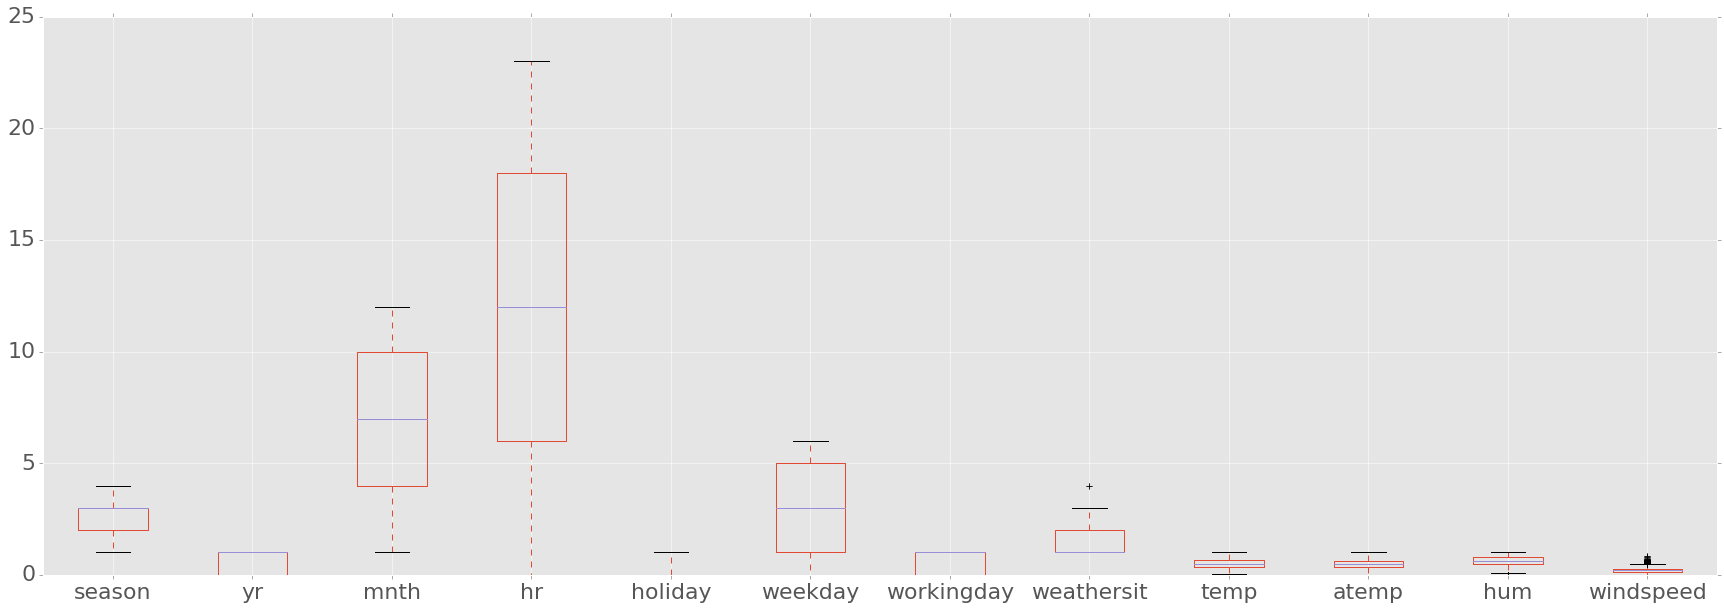

In [82]:
# looking at the box plot of the features (Gives you the five-number-summary.)
df.iloc[:,1:14].plot.box()

#Making the inline plot bigger 
matplotlib.rcParams['figure.figsize'] = (30.0, 10.0) 
#Making the font size of the plot bigger 
matplotlib.rcParams.update({'font.size': 22})

[<matplotlib.text.Text at 0xb558370>, <matplotlib.text.Text at 0x130697f0>]

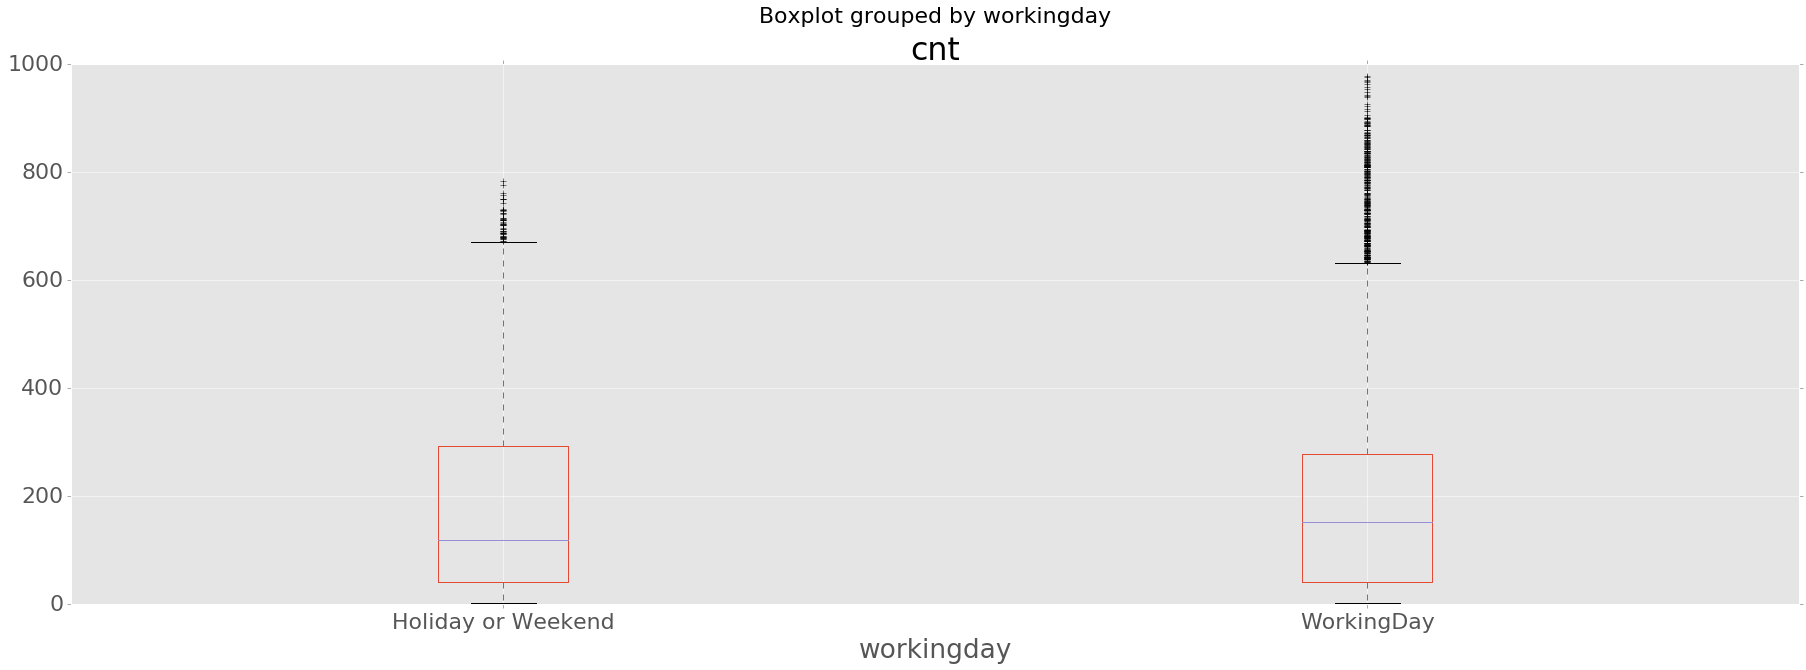

In [22]:
# Hypothesis : On average more bikes are rented out on work days ( s)
#fig, axs = plt.subplots(1,2 ,sharex=True, sharey=True)

#df[df['workingday']>0].cnt.plot(ax=axs[0],kind='box',title='Working Day',fontsize=22)
#df[df['workingday']==0].cnt.plot(ax=axs[1],kind='box',title='Holiday or weekend',fontsize=22)
ax=df.boxplot(column=u'cnt', by=u'workingday')
ax.set_xticklabels(['Holiday or Weekend','WorkingDay'])

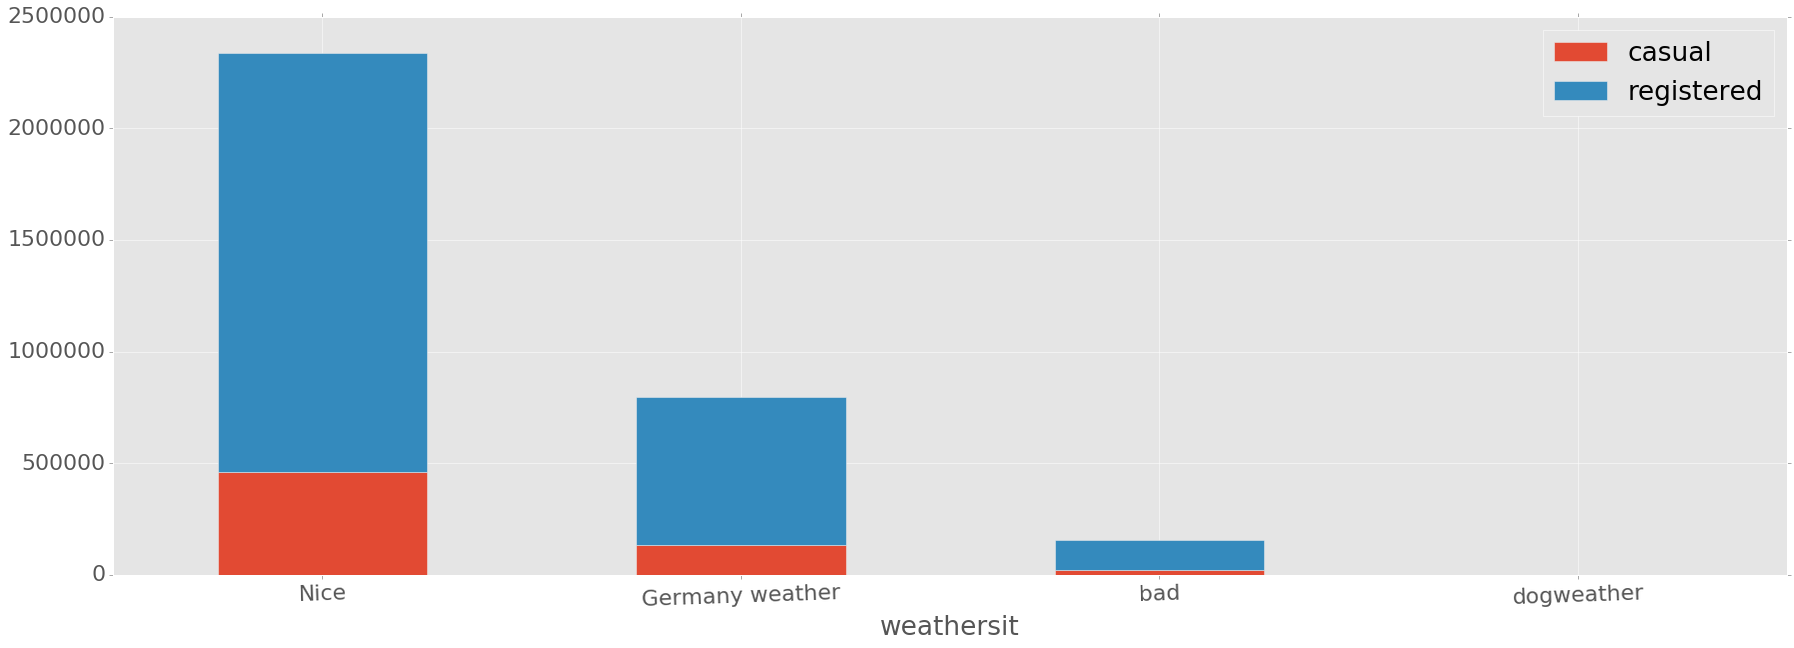

In [16]:
#hypothesis : if it is cold , less  bikes are rented
# subhypthesis Registered user take more bikes than the casual user

# Groupby the weathersit and sum the casual and registered user. 
ax=df.groupby('weathersit')['casual','registered'].sum().plot(kind='bar',rot=2,stacked=True)
ax.set_xticklabels(['Nice','Germany weather','bad','dogweather'])

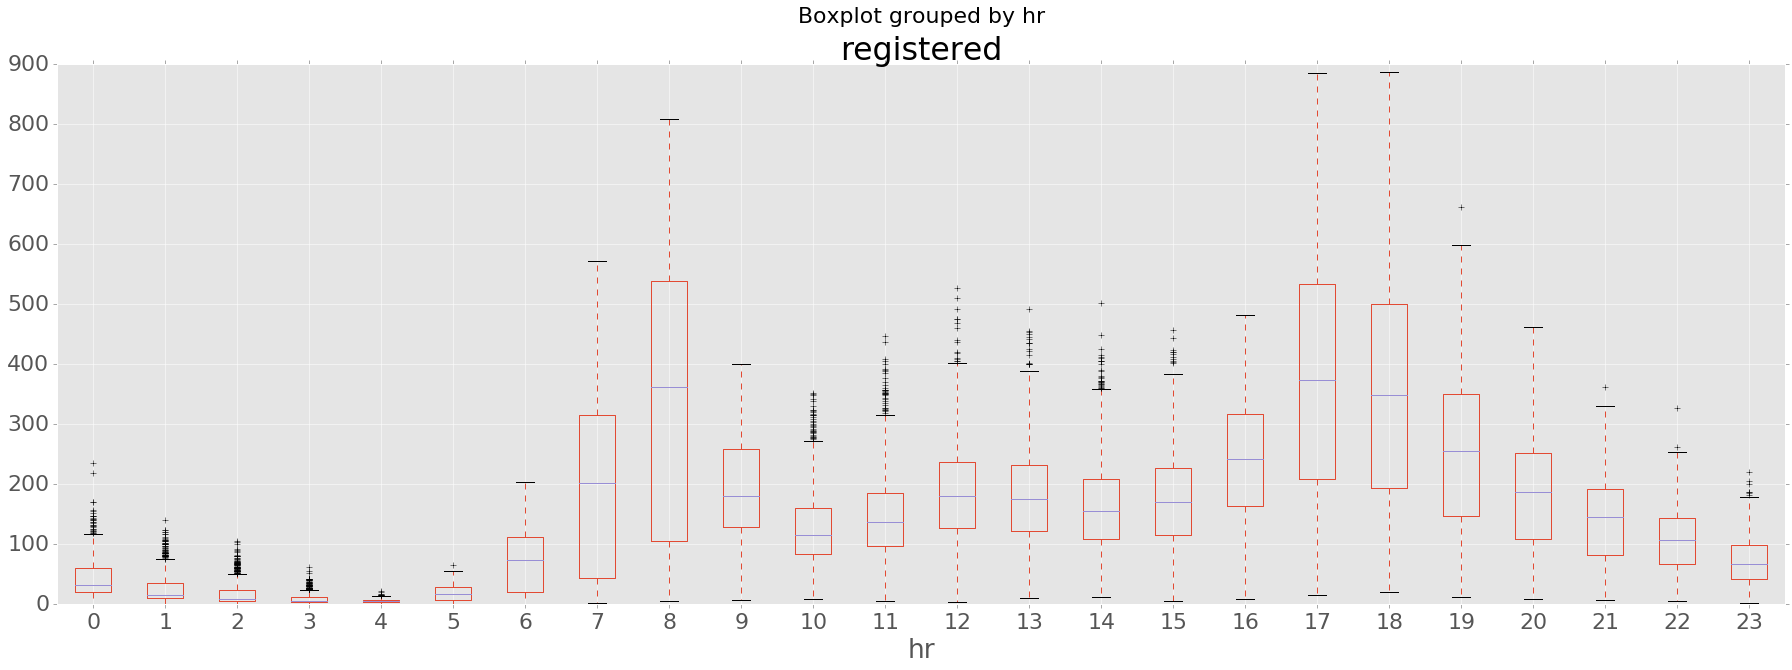

In [18]:
#Hypothesis : The registered users tend to go to work and come back with the bike
#in other word , the registered user tend to rent the bike mostly between 7-9 and 17-19
df.boxplot(column=u'registered', by=u'hr')

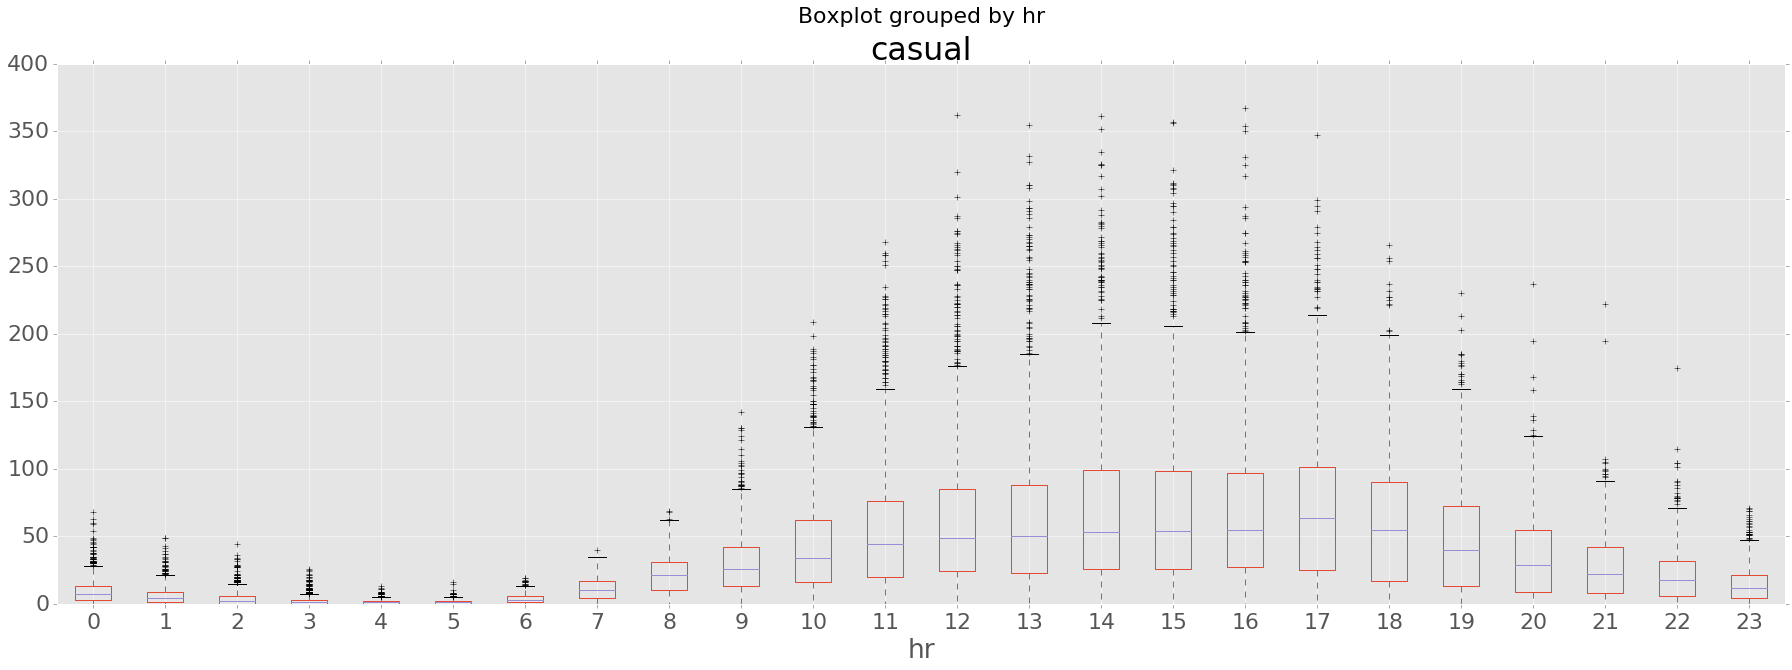

In [19]:
# as for casual users they have a different trend 
df.boxplot(column=u'casual', by=u'hr')

[<matplotlib.text.Text at 0x130223b0>, <matplotlib.text.Text at 0x1304c8d0>]

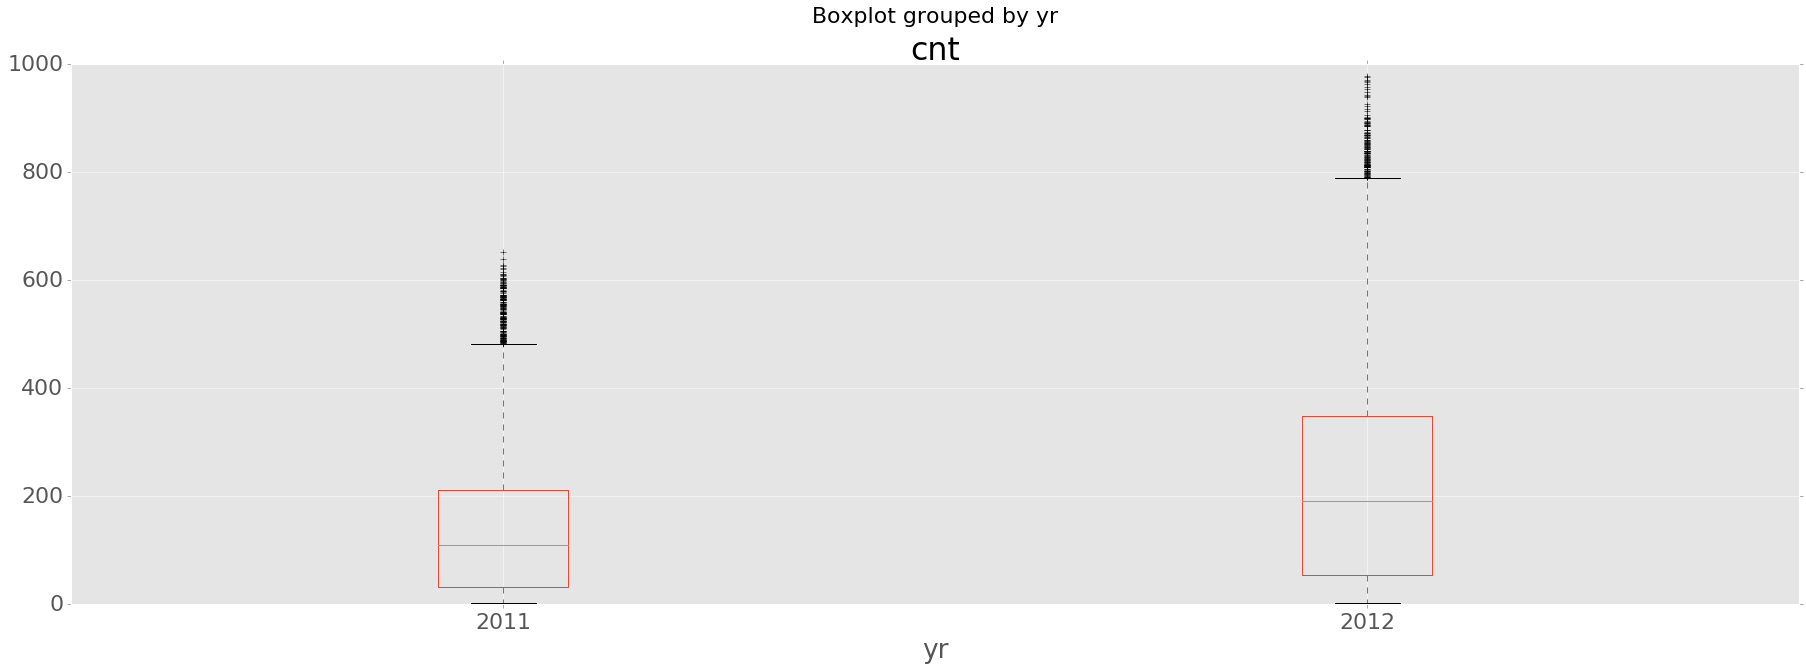

In [23]:
# we have an increse in number of rented bikes in year 2012. 
ax=df.boxplot(column=u'cnt', by=u'yr')
ax.set_xticklabels(['2011','2012'])

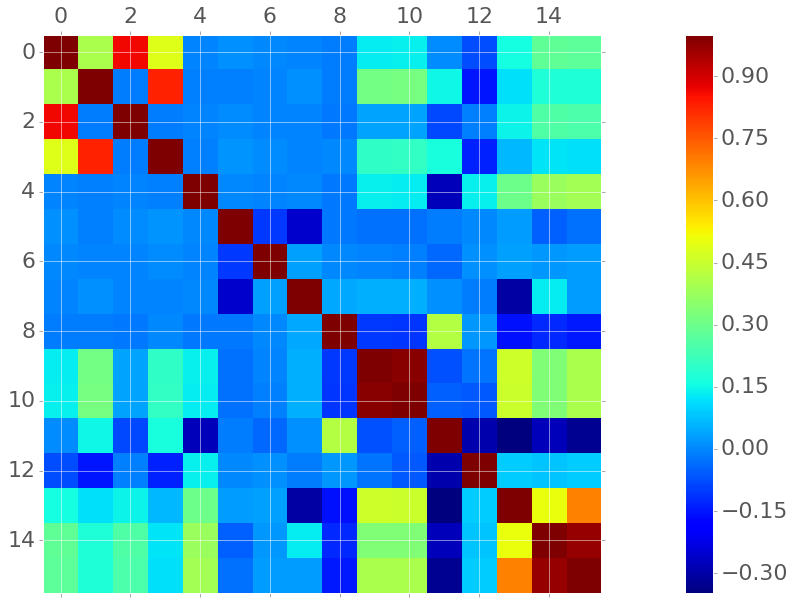

In [83]:
#  the highly correlated features can be dropped out
#with correlation matrix one can see the correlation of the data points 
# The Heatmap shows a high correalation between atemp, and temp ( therefore atemp can be removed. )
#there is negative corelation between 

fig= plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr())
fig.colorbar(cax)

In [42]:
#Dummifying the categorical features Weathersit and season and writing to a new dataframe

df1 = df.join(pd.get_dummies(df.weathersit, prefix='weathersit'))
df1= df1.join(pd.get_dummies(df1.season, prefix='season'))

#choosing the features of interest , the causual and registered are removed, 
 

keys=['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'temp', 
       'hum', 'windspeed', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'season_1', 'season_2',
       'season_3', 'season_4']

#Scaling of the data 
df1_scaled = preprocessing.scale(df1[keys])



In [43]:
#splitting the data into training and test set, 10% of the data is used for testing 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df1_scaled, df1.cnt, 
                                                                    test_size=0.1, random_state=0)

In [72]:
y_predict_linReg,score_linReg=linReg(X_train, X_test, y_train, y_test)


for Linear Regression  R^2 is 0.393360195068,Mean Square error is:19615.9700528 & mean absouloute error is :103.244504129 


In [71]:
y_predict_svm,score_svm=supportVectorReg(X_train, X_test, y_train, y_test)


for Support Vector Regression R^2 is 0.547938708012,Mean Square error is:14617.6045383 & mean absouloute error is :72.2694328201 


In [70]:
y_predict_tree,score_tree=treeReg(X_train, X_test, y_train, y_test)


for Tree Regression R^2 is:0.898667890435 ,Mean Square error is:3276.61919058 & mean absouloute error is :35.204769941 


In [62]:
y_predict_randomForest,score_randomForest=randomForestReg(X_train, X_test, y_train, y_test)

for Support Vector Regression R^2 is 0.941140412933,Mean Square error is:1903.25113493 & mean absouloute error is :26.4666762562 


In [ ]:
#Outlook
# # 
# There are still much more to do : 
# Tweaking model parameter to get a better score
# The random forest works better than the other methods , however in order to make a better prediction one can tweak the 
# features of the random forest, for example playing with the number of trees. 

# Feature engineering
# The next step would be also to try different scaling approach , and also to create extra features such as 
# weekend (from the weekday ) .

# Avoiding over fitting
# By using ensemble models or adding the regularization parameter to linear regression or 
# by cross validating, one can stop the over fitting from happening. 

# Timing 
# which algorithm works faster (find a trade off between time and accuracy)

# Nasim Khadem 
#for more info please email me at nasim.khadem@rwth-aachen.de 
